In [95]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns

In [96]:
datos = pd.read_csv('climate_change_data.csv')

In [97]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [98]:
datos


,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [100]:
datos_1 = datos.drop_duplicates()
datos_1

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [101]:
datos.isna().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [102]:
datos_arg=datos_1[datos_1['Country']=="Argentina"]

In [103]:
datos_arg

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
159,2000-05-13 13:45:38.073807380,Johnsonton,Argentina,16.800561,343.985563,-1.369808,78.150472,49.815801,34.978870
465,2001-01-25 15:20:15.121512148,Katiestad,Argentina,5.742339,436.923346,1.117287,23.215202,44.633592,48.175024
526,2001-03-17 21:13:13.879387936,New Kellyfort,Argentina,13.081111,384.948369,-1.057498,11.184193,49.370422,0.366536
619,2001-06-04 00:17:16.903690368,South Lindamouth,Argentina,15.415434,533.990357,1.140201,86.660315,57.283704,26.533294
709,2001-08-18 14:52:10.153015296,New Kimberlyfurt,Argentina,17.920404,428.354405,-0.236862,99.991900,41.597509,33.333210
964,2002-03-20 20:11:01.026102608,Alexandermouth,Argentina,21.782444,429.036806,0.287862,4.110646,61.641293,19.193947
1333,2003-01-24 19:58:03.348334832,Port Justin,Argentina,25.398761,488.654472,-0.167770,51.518289,49.284094,5.101245
1350,2003-02-08 02:43:18.739873984,East Luisberg,Argentina,14.958604,468.567609,-0.658690,17.016151,18.508503,4.159785
1438,2003-04-23 00:58:45.472547248,Lopeztown,Argentina,12.987546,379.048541,-0.788749,49.126569,92.775814,44.708632
2091,2004-10-22 14:46:33.159315936,East Karla,Argentina,7.176339,415.892590,0.794461,1.901812,31.913606,38.627811


In [104]:
datos1_arg=datos_arg[['Date','Wind Speed','Temperature' ]]

In [105]:
datos1_arg

,Date,Wind Speed,Temperature
159,2000-05-13 13:45:38.073807380,34.978870,16.800561
465,2001-01-25 15:20:15.121512148,48.175024,5.742339
526,2001-03-17 21:13:13.879387936,0.366536,13.081111
619,2001-06-04 00:17:16.903690368,26.533294,15.415434
709,2001-08-18 14:52:10.153015296,33.333210,17.920404
964,2002-03-20 20:11:01.026102608,19.193947,21.782444
1333,2003-01-24 19:58:03.348334832,5.101245,25.398761
1350,2003-02-08 02:43:18.739873984,4.159785,14.958604
1438,2003-04-23 00:58:45.472547248,44.708632,12.987546
2091,2004-10-22 14:46:33.159315936,38.627811,7.176339


In [106]:
datos1_arg.describe()

,Wind Speed,Temperature
count,40.000000,40.000000
mean,19.700578,14.432715
std,14.334501,5.084958
min,0.366536,2.524144
25%,7.574688,11.917938
50%,15.138173,14.188842
75%,33.509486,17.713598
max,49.280938,25.398761


In [107]:
datos2_arg=datos1_arg
datos2_arg['Date'] = pd.to_datetime(datos1_arg['Date'])
datos2_arg.set_index('Date', inplace=True)

<ipython-input-107-05d587a2a53d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos2_arg['Date'] = pd.to_datetime(datos1_arg['Date'])


In [108]:
datos2_arg

,Wind Speed,Temperature
Date,,
2000-05-13 13:45:38.073807380,34.978870,16.800561
2001-01-25 15:20:15.121512148,48.175024,5.742339
2001-03-17 21:13:13.879387936,0.366536,13.081111
2001-06-04 00:17:16.903690368,26.533294,15.415434
2001-08-18 14:52:10.153015296,33.333210,17.920404
2002-03-20 20:11:01.026102608,19.193947,21.782444
2003-01-24 19:58:03.348334832,5.101245,25.398761
2003-02-08 02:43:18.739873984,4.159785,14.958604
2003-04-23 00:58:45.472547248,44.708632,12.987546


<Axes: xlabel='Date', ylabel='Wind Speed'>

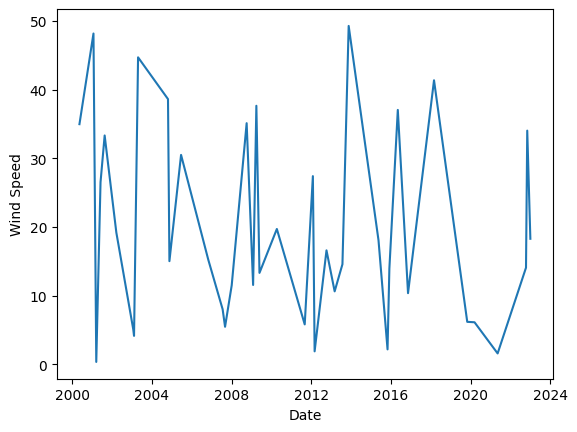

In [109]:
sns.lineplot(data=datos2_arg, x='Date', y='Wind Speed')

<Axes: xlabel='Date', ylabel='Temperature'>

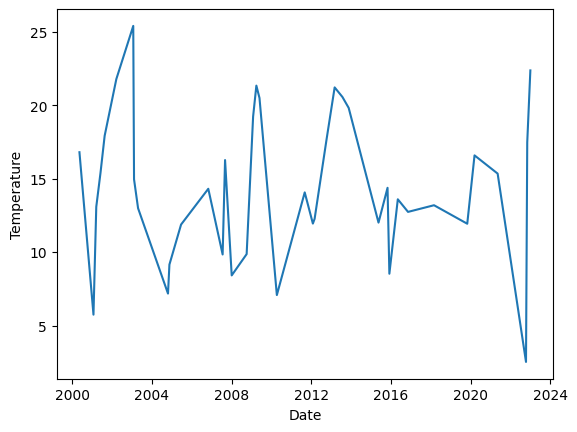

In [110]:
sns.lineplot(data=datos2_arg, x='Date', y='Temperature')

<Axes: xlabel='Wind Speed', ylabel='Temperature'>

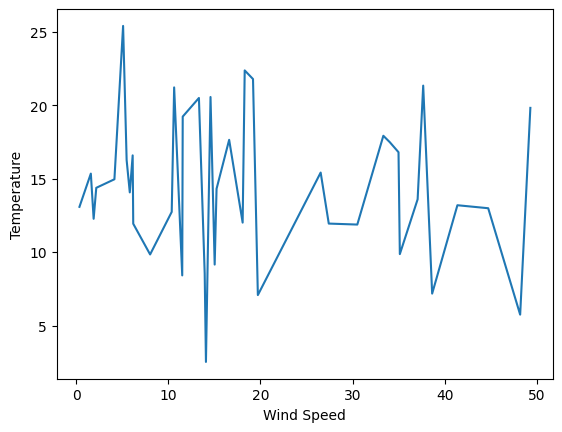

In [111]:
sns.lineplot(data=datos2_arg, x='Wind Speed', y='Temperature')

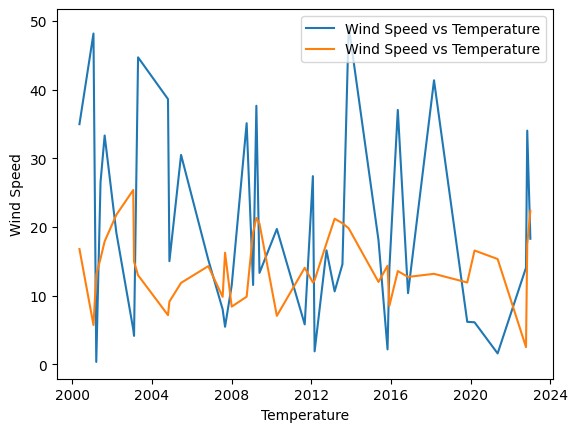

In [116]:
plt.plot(datos2_arg, label="Wind Speed vs Temperature")
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.legend();
